In [1]:
import pandas as pd
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [13]:
data = pd.read_csv('insurance.csv')

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [15]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [16]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [17]:
data[data.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [18]:
data[data['charges'] == 1639.5631]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [20]:
data = data.drop_duplicates()

In [9]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [22]:
obj_col = ['sex', 'children', 'smoker', 'region']

In [24]:
for i in obj_col:
    print(i, data[i].unique())

sex ['female' 'male']
children [0 1 3 2 5 4]
smoker ['yes' 'no']
region ['southwest' 'southeast' 'northwest' 'northeast']


In [35]:
obj_col1 = ['sex', 'bmi', 'children', 'smoker', 'region', 'charges']

In [41]:
for i in obj_col1:
    print(i, '\n' ,data[i].value_counts())
    print('----')

sex 
 male      675
female    662
Name: sex, dtype: int64
----
bmi 
 32.30    13
28.31     9
30.80     8
31.35     8
28.88     8
         ..
46.20     1
23.80     1
44.77     1
32.12     1
30.97     1
Name: bmi, Length: 548, dtype: int64
----
children 
 0    573
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64
----
smoker 
 no     1063
yes     274
Name: smoker, dtype: int64
----
region 
 southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64
----
charges 
 16884.92400    1
2117.33885     1
2221.56445     1
19798.05455    1
13063.88300    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: charges, Length: 1337, dtype: int64
----


In [43]:
data.groupby('region')['charges'].mean()

region
northeast    13406.384516
northwest    12450.840844
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64

In [46]:
Q1 = data['charges'].quantile(0.25)

In [47]:
Q3 = data['charges'].quantile(0.75)

In [49]:
outliers = Q3 + (Q3 - Q1) * 1.5

In [50]:
outliers

34524.777625

In [53]:
data = data[data['charges'] <= outliers]

In [54]:
from sklearn.preprocessing import LabelEncoder

In [55]:
col_list = ['sex', 'smoker', 'region']
for col in col_list:
    label = LabelEncoder()
    label.fit(data[col].unique())
    data[col] = label.transform(data[col])

C:\Users\user\AppData\Local\Temp\ipykernel_9912\1692726962.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = label.transform(data[col])


In [58]:
for i in col_list:
    print(i, '\n', data[i].value_counts())
    print('--------')

sex 
 0    612
1    586
Name: sex, dtype: int64
--------
smoker 
 0    1060
1     138
Name: smoker, dtype: int64
--------
region 
 2    307
1    304
0    296
3    291
Name: region, dtype: int64
--------


In [63]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [4]:
smoker_mapping = {'yes' : 1, 'no' : 0 }

In [5]:
data['smoker_map'] = data['smoker'].str.lower().map(smoker_mapping)

In [20]:
data

,age,sex,bmi,children,smoker,region,charges,smoker_map
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


In [15]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [23]:
import numpy as np

In [21]:
data['region_map'] = np.where(data['region'].str.lower() == 'southwest', 1,
                              np.where(data['region'].str.lower() == 'southeast', 2,
                                       np.where(data['region'].str.lower() == 'northwest', 3, 4)))

In [22]:
data

,age,sex,bmi,children,smoker,region,charges,smoker_map,region_map
0,19,female,27.900,0,yes,southwest,16884.92400,1,1
1,18,male,33.770,1,no,southeast,1725.55230,0,2
2,28,male,33.000,3,no,southeast,4449.46200,0,2
3,33,male,22.705,0,no,northwest,21984.47061,0,3
4,32,male,28.880,0,no,northwest,3866.85520,0,3
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,3
1334,18,female,31.920,0,no,northeast,2205.98080,0,4
1335,18,female,36.850,0,no,southeast,1629.83350,0,2
1336,21,female,25.800,0,no,southwest,2007.94500,0,1


In [24]:
gender_mapping = {'female' : 1, 'male' : 0}

In [27]:
data['gender_map'] = data['sex'].map(gender_mapping)

In [28]:
data

,age,sex,bmi,children,smoker,region,charges,smoker_map,region_map,gender_map
0,19,female,27.900,0,yes,southwest,16884.92400,1,1,1
1,18,male,33.770,1,no,southeast,1725.55230,0,2,0
2,28,male,33.000,3,no,southeast,4449.46200,0,2,0
3,33,male,22.705,0,no,northwest,21984.47061,0,3,0
4,32,male,28.880,0,no,northwest,3866.85520,0,3,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,3,0
1334,18,female,31.920,0,no,northeast,2205.98080,0,4,1
1335,18,female,36.850,0,no,southeast,1629.83350,0,2,1
1336,21,female,25.800,0,no,southwest,2007.94500,0,1,1


In [29]:
data1 = data.drop(['sex', 'smoker', 'region'], axis = 1)

In [30]:
data1

,age,bmi,children,charges,smoker_map,region_map,gender_map
0,19,27.900,0,16884.92400,1,1,1
1,18,33.770,1,1725.55230,0,2,0
2,28,33.000,3,4449.46200,0,2,0
3,33,22.705,0,21984.47061,0,3,0
4,32,28.880,0,3866.85520,0,3,0
...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,3,0
1334,18,31.920,0,2205.98080,0,4,1
1335,18,36.850,0,1629.83350,0,2,1
1336,21,25.800,0,2007.94500,0,1,1


In [33]:
data1

,age,bmi,children,smoker_map,region_map,gender_map,charges
0,19,27.900,0,1,1,1,16884.92400
1,18,33.770,1,0,2,0,1725.55230
2,28,33.000,3,0,2,0,4449.46200
3,33,22.705,0,0,3,0,21984.47061
4,32,28.880,0,0,3,0,3866.85520
...,...,...,...,...,...,...,...
1333,50,30.970,3,0,3,0,10600.54830
1334,18,31.920,0,0,4,1,2205.98080
1335,18,36.850,0,0,2,1,1629.83350
1336,21,25.800,0,0,1,1,2007.94500


In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [20, 8]

In [47]:
data1_corr = data1.corr()

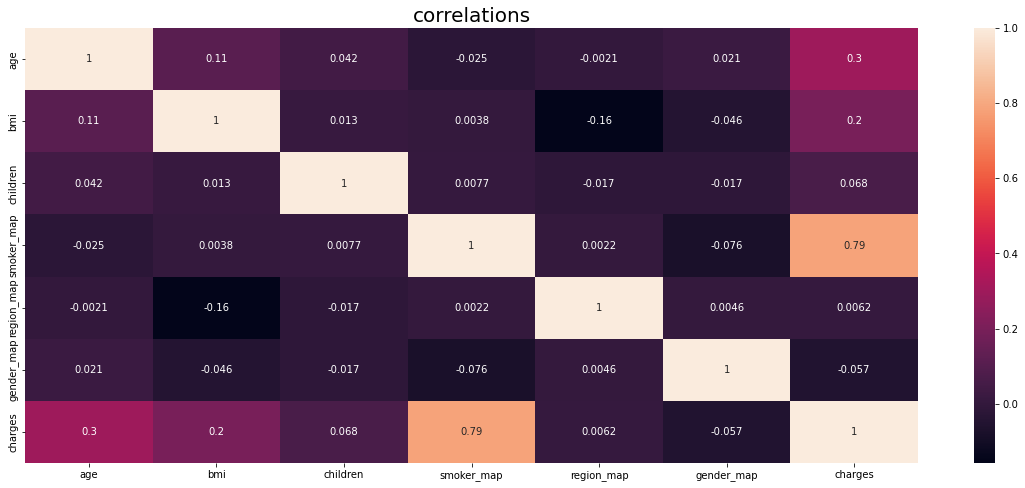

In [48]:
corr = sns.heatmap(data1_corr, annot = True)
plt.title('correlations', fontsize = 20)
plt.show()

In [65]:
x = data.drop('charges', axis = 1)

In [66]:
y = data['charges']

In [67]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [53]:
model1 = LinearRegression()

In [55]:
model1.fit(x_train, y_train)

LinearRegression()

In [57]:
pre_test = model1.predict(x_test)

In [59]:
len(pre_test)

268

In [60]:
len(y_test)

268

In [61]:
mean_absolute_error(pre_test, y_test)

3930.3332739011375

In [66]:
x1 = data1.drop(['charges', 'region_map'], axis = 1)

In [67]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y, test_size = 0.2, random_state = 0)

In [68]:
model2 = LinearRegression()
model2.fit(x1_train, y1_train)
pre_test1 = model2.predict(x1_test)
mean_absolute_error(pre_test1, y1_test)

3939.780806966829

In [69]:
from sklearn.ensemble import GradientBoostingRegressor

In [70]:
x2 = data1.drop('charges', axis = 1) 

In [76]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y, test_size = 0.3, random_state = 0)

In [77]:
model3 = GradientBoostingRegressor()
model3.fit(x2_train, y2_train)
pre_test2 = model3.predict(x2_test)
mean_absolute_error(pre_test2, y2_test)

2558.7727795407

In [59]:
from sklearn.preprocessing import PolynomialFeatures

In [62]:
pol = PolynomialFeatures(degree = 2)

In [68]:
x_pol = pol.fit_transform(x)

In [69]:
x_pol

array([[ 1., 19.,  0., ...,  1.,  3.,  9.],
       [ 1., 18.,  1., ...,  0.,  0.,  4.],
       [ 1., 28.,  1., ...,  0.,  0.,  4.],
       ...,
       [ 1., 18.,  0., ...,  0.,  0.,  4.],
       [ 1., 21.,  0., ...,  0.,  0.,  9.],
       [ 1., 61.,  0., ...,  1.,  1.,  1.]])

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x_pol, y, test_size = 0.2, random_state = 0)

In [ ]:
# feature가 많으면 유리하다! 